<a href="https://colab.research.google.com/github/maracasabat/Data-Science-HW6/blob/main/Hw_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [2]:
from pyspark.sql import Row
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt 
import seaborn as sns
from pyspark.sql.functions import mean, stddev, max , min

## Завдання 1

1. Створити спарк сесію.

In [3]:
sc = SparkSession.builder.getOrCreate()

2. Прочитати датасет до датафрейму.

In [4]:
df = sc.read.csv('/content/bestsellers with categories.csv', header=True, inferSchema=True)
df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

3. Використовуючи тільки RDD обчислити середню ціну всіх книг, у яких рейтинг вищий за 4.7

In [5]:
df1 = df.filter(df['User Rating'] > 4.7)
df1.show(10)

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|  Alexander Hamilton|         Ron Chernow|        4.8|   9198|   13|2016|Non Fiction|
|Barefoot Contessa...|          Ina Garten|        4.8|   1296|   24|2012|Non Fiction|
|            Becoming|      Michelle Obama|        4.8|  61133|   11|2018|Non Fiction|
|            Becoming|      Michelle Obama|        4.8|  61133|   11|2019|Non Fiction|
|Being Mortal: Med...|        Atul Gawande|        4.8|  11113|   15|2015|Non Fiction|
|Brown Bear, Brown...|     Bill Martin Jr.|        4.9|  14344|    5|2017|    Fiction|
|Brown Bear, Brown...|     Bill Martin Jr.|        4.9|  14344|    5|2019|    Fiction|
|Cabin Fever (Diar...|         Jeff Kinney|

In [6]:
df1.agg({'Price': 'avg'}).show()

+-----------------+
|       avg(Price)|
+-----------------+
|10.69832402234637|
+-----------------+



4. Побудувати гістограму розподілу рецензій (стовпець Reviews).

In [7]:
df2 = df['Author','Reviews'].toPandas()

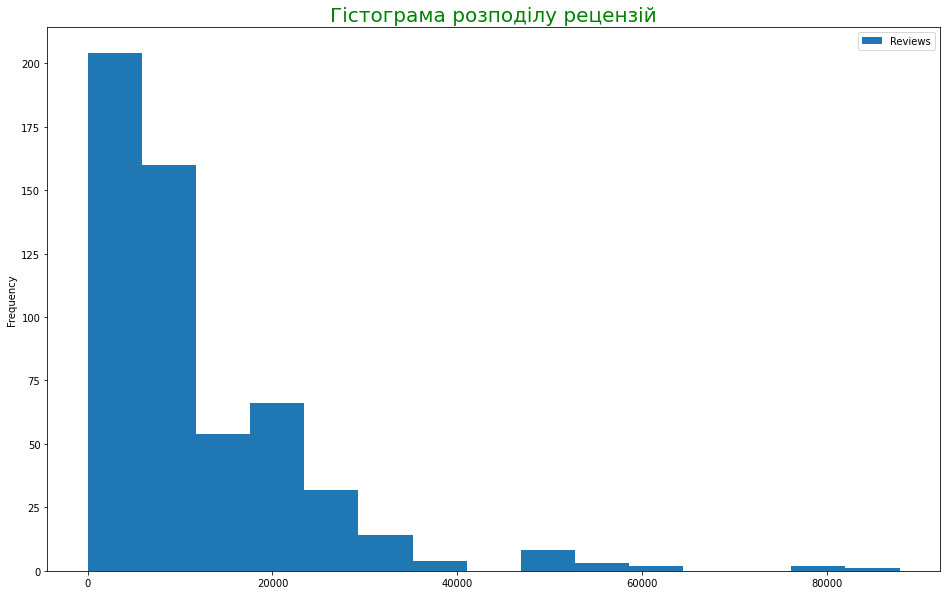

In [8]:
df2.plot.hist(y='Reviews', figsize=(16, 10), bins=15)
plt.title('Гістограма розподілу рецензій', fontsize=20, color='g')
plt.show()

5. Побудувати матрицю кореляції для стовпців "User Rating", "Reviews" та "Price".

In [9]:
df3 = df['User Rating', 'Reviews', 'Price'].toPandas()
df3.corr(method='pearson')

,User Rating,Reviews,Price
User Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


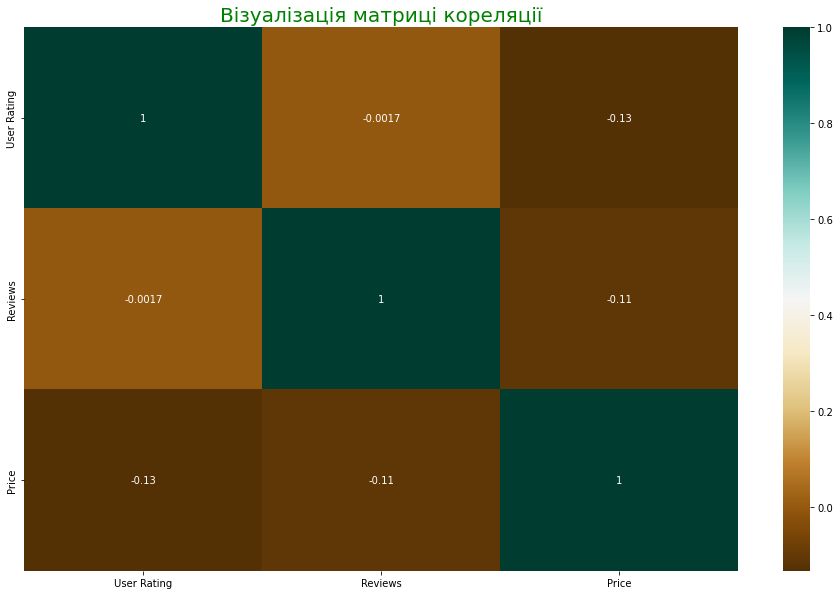

In [10]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.heatmap(df3.corr(), annot=True, cmap='BrBG')
plt.title('Візуалізація матриці кореляції', fontsize=20, color='g')
plt.show()

6. Використовуючи бібліотеку seaborn побудувати парні графіки (pairplots) стовпців "User Rating", "Reviews" та "Price".

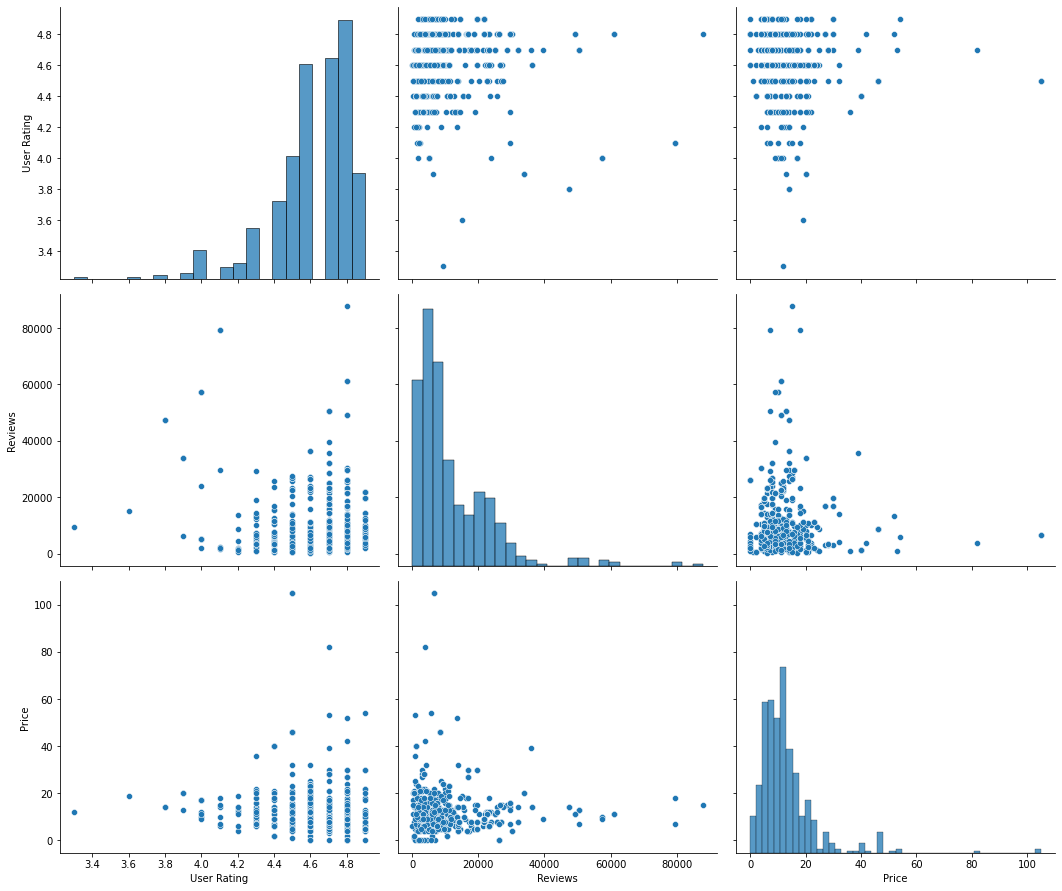

In [11]:
p=sns.pairplot(df3)
p.fig.set_size_inches(16, 13)

## Завдання 2

1. Знайдіть автора із найвищим рейтингом.

In [12]:
df4 = df.withColumnRenamed("User Rating", "user_rating")
df4.createOrReplaceTempView("books")

In [13]:
max_rate = sc.sql("SELECT DISTINCT Author, user_rating FROM books WHERE user_rating == (SELECT MAX(user_rating) FROM books)").show()

+--------------------+-----------+
|              Author|user_rating|
+--------------------+-----------+
|Emily Winfield Ma...|        4.9|
|     Bill Martin Jr.|        4.9|
|          Eric Carle|        4.9|
|          Pete Souza|        4.9|
|      Nathan W. Pyle|        4.9|
|         Jeff Kinney|        4.9|
|     Brandon Stanton|        4.9|
|        J.K. Rowling|        4.9|
|         Chip Gaines|        4.9|
|           Dr. Seuss|        4.9|
|      Alice Schertle|        4.9|
|       Rush Limbaugh|        4.9|
|          Dav Pilkey|        4.9|
|       J. K. Rowling|        4.9|
|      Patrick Thorpe|        4.9|
|       Mark R. Levin|        4.9|
|Sherri Duskey Rinker|        4.9|
|          Jill Twiss|        4.9|
|         Sarah Young|        4.9|
|  Lin-Manuel Miranda|        4.9|
+--------------------+-----------+



2. Знайдіть трьох авторів із найнижчим рейтингом.

In [14]:
min_rate = sc.sql("SELECT DISTINCT Author, user_rating FROM books ORDER BY user_rating LIMIT 3").show()

+------------+-----------+
|      Author|user_rating|
+------------+-----------+
|J.K. Rowling|        3.3|
|  Harper Lee|        3.6|
|   E L James|        3.8|
+------------+-----------+



3. Визначте, який автор отримав найбільшу кількість рецензій.

In [15]:
max_reviews = sc.sql("SELECT DISTINCT Author, Reviews FROM books WHERE Reviews == (SELECT MAX(Reviews) FROM books)").show()

+-----------+-------+
|     Author|Reviews|
+-----------+-------+
|Delia Owens|  87841|
+-----------+-------+



4. Визначте, який автор написав найбільшу кількість книг за весь доступний у даних період.

In [16]:
max_books = sc.sql("SELECT Author, number FROM (SELECT Author, COUNT(Author) as number FROM books GROUP BY Author) ORDER BY number DESC LIMIT 1").show(100)

+-----------+------+
|     Author|number|
+-----------+------+
|Jeff Kinney|    12|
+-----------+------+



5. Визначте, яка книга жанру "Fiction" має найменший рейтинг.

In [17]:
lowest_rating = sc.sql("SELECT Name, Genre, user_rating FROM books WHERE Genre == 'Fiction' ORDER BY user_rating LIMIT 1").show()

+------------------+-------+-----------+
|              Name|  Genre|user_rating|
+------------------+-------+-----------+
|The Casual Vacancy|Fiction|        3.3|
+------------------+-------+-----------+



6. Визначте, яка книга жанру "Non Fiction" має найвищий рейтинг.

In [18]:
highest_rating = sc.sql("SELECT DISTINCT Name, Genre, user_rating FROM books WHERE Genre == 'Non Fiction' AND user_rating = (SELECT MAX(user_rating) FROM books)").show()

+--------------------+-----------+-----------+
|                Name|      Genre|user_rating|
+--------------------+-----------+-----------+
|Humans of New Yor...|Non Fiction|        4.9|
|Jesus Calling: En...|Non Fiction|        4.9|
|  The Magnolia Story|Non Fiction|        4.9|
|Unfreedom of the ...|Non Fiction|        4.9|
|Obama: An Intimat...|Non Fiction|        4.9|
|Hamilton: The Rev...|Non Fiction|        4.9|
+--------------------+-----------+-----------+



## Завдання 3

Побудуйте гістограму середньої кількості рецензій за роками. У вигляді окремої гістограми візуалізуйте кількість книг жанру "Fiction" та "Non Fiction" за весь доступний період.

In [19]:
df5 = df.groupBy('Year').agg({'Reviews': 'avg'}).toPandas()

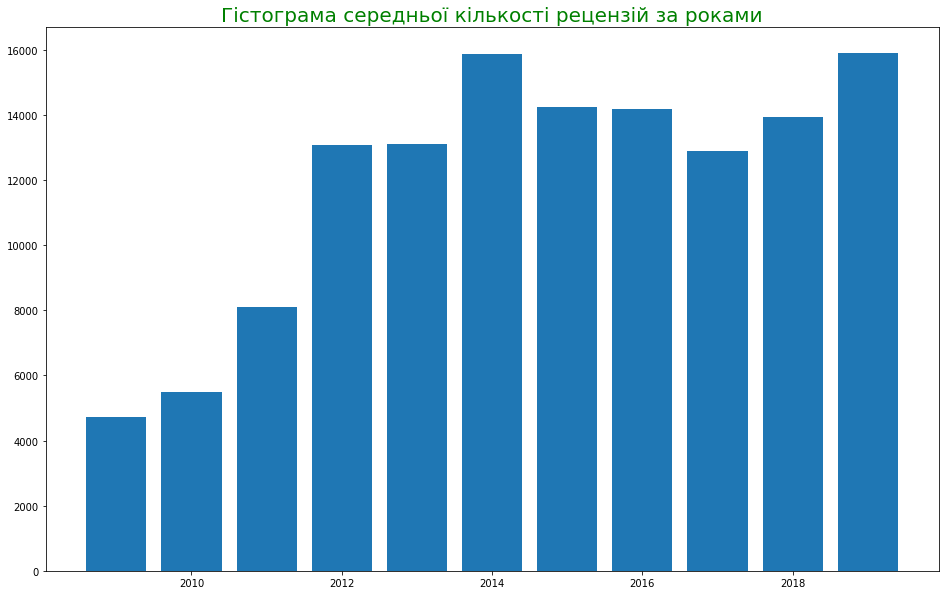

In [20]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.bar(df5['Year'], df5['avg(Reviews)'])
plt.title('Гістограма середньої кількості рецензій за роками', fontsize=20, color='g')
plt.show()

In [21]:
df6 = df.groupby(["year", "genre"]).count().toPandas()

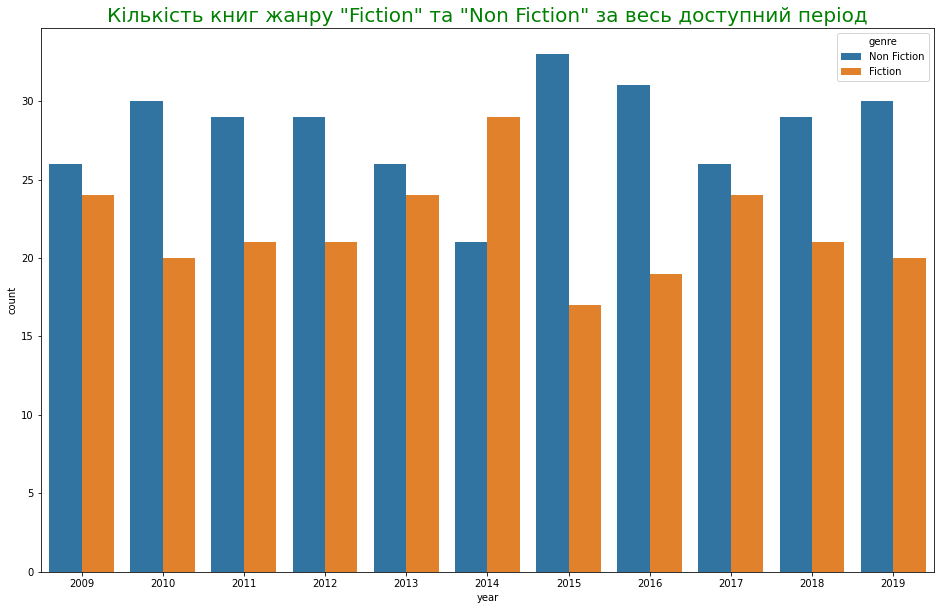

In [22]:
plt.rcParams["figure.figsize"] = (16, 10)
sns.barplot(x="year", y="count", hue="genre", data=df6)
plt.title('Кількість книг жанру "Fiction" та "Non Fiction" за весь доступний період', fontsize=20, color='g')
plt.show()

## Завдання 4 (за бажанням)

Спробуйте портувати код, написаний вами раніше під pandas датафрейми на спарк датафрейми.

Для спрощення подальшої роботи, давайте трохи підправимо назви змінних. Як бачите, тут усі назви починаються з великої літери, а одна - навіть містить прогалину. Це дуже небажано і може бути досить незручним. Давайте змінимо регістр на невеликий, а пропуск замінимо на нижнє підкреслення (snake_style). А заразом і вивчимо корисний атрибут датафрейму: columns(можна просто присвоїти список нових імен цьому атрибуту)

In [23]:
df = df.toDF('name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre')
df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                name|              author|user_rating|reviews|price|year|      genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [24]:
df.describe().show()

+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                name|          author|        user_rating|           reviews|             price|              year|      genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                null|            null|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       null|
| stddev|                null|            null|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       null|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|                37|                 0|              2009|    Fiction|
|    max|You Are a Badass:...|    Zhi Gan

Максимальний рейтинг в датасеті

In [25]:
df.agg({'user_rating': 'max'}).show()

+----------------+
|max(user_rating)|
+----------------+
|             4.9|
+----------------+



Кількість книг які мають максимальний рейтинг

In [26]:
df.filter(df['user_rating'] == 4.9).count()

52

Книга з найбільшою кількістю відгуків

In [27]:
df.sort(df['reviews'].desc()).show(1)

+--------------------+-----------+-----------+-------+-----+----+-------+
|                name|     author|user_rating|reviews|price|year|  genre|
+--------------------+-----------+-----------+-------+-----+----+-------+
|Where the Crawdad...|Delia Owens|        4.8|  87841|   15|2019|Fiction|
+--------------------+-----------+-----------+-------+-----+----+-------+
only showing top 1 row



Кількість книг жанру Fiction потрапили до Топ-50 у 2010 році

In [28]:
df.filter((df['year'] == 2010) & (df['genre'] == 'Fiction')).count()

20

Кількість книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках

In [29]:
df.filter((df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))).show()

+--------------------+-----------+-----------+-------+-----+----+-----------+
|                name|     author|user_rating|reviews|price|year|      genre|
+--------------------+-----------+-----------+-------+-----+----+-----------+
|Jesus Calling: En...|Sarah Young|        4.9|  19576|    8|2011|Non Fiction|
+--------------------+-----------+-----------+-------+-----+----+-----------+



Відсортуємо за зростанням ціни всі книги, які потрапили в рейтинг у 2015 році і коштують дешевше за 8 доларів

In [30]:
df.filter((df['price'] < 8) & (df['year'] == 2015)).sort(df['price']).show()

+--------------------+------------------+-----------+-------+-----+----+-----------+
|                name|            author|user_rating|reviews|price|year|      genre|
+--------------------+------------------+-----------+-------+-----+----+-----------+
|To Kill a Mocking...|        Harper Lee|        4.8|  26234|    0|2015|    Fiction|
|Giraffes Can't Dance|     Giles Andreae|        4.8|  14038|    4|2015|    Fiction|
|Knock-Knock Jokes...|       Rob Elliott|        4.5|   3673|    4|2015|Non Fiction|
|Laugh-Out-Loud Jo...|       Rob Elliott|        4.6|   6990|    4|2015|Non Fiction|
|Creative Haven Cr...|   Marjorie Sarnat|        4.8|   4022|    4|2015|Non Fiction|
|     First 100 Words|      Roger Priddy|        4.7|  17323|    4|2015|Non Fiction|
|Dover Creative Ha...|       Marty Noble|        4.6|   2134|    5|2015|Non Fiction|
|The Very Hungry C...|        Eric Carle|        4.9|  19546|    5|2015|    Fiction|
|Baby Touch and Fe...|                DK|        4.6|   5360|    

Максимальна ціна книг жанру Fiction та Non Fiction

In [31]:
df.groupBy('genre').agg({'price': 'max'}).show()

+-----------+----------+
|      genre|max(price)|
+-----------+----------+
|    Fiction|        82|
|Non Fiction|       105|
+-----------+----------+



Мінімальна ціна книг жанру Fiction та Non Fiction

In [32]:
df.groupBy('genre').agg({'price': 'min'}).show()

+-----------+----------+
|      genre|min(price)|
+-----------+----------+
|    Fiction|         0|
|Non Fiction|         0|
+-----------+----------+

